# Client 1 summary and analysis
This aims to implement a cube and do presentation
## Cube

In [1]:
import atoti as tt

Welcome to Atoti 0.8.10!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [2]:
session = tt.Session(
    user_content_storage=".content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"]
)

In [3]:
db_name = "project1"
db_user = "postgres"
db_password = "postgres"
db_host = "pgdb"
db_port = "5432"

jdbc_url = f"jdbc:postgresql://{db_host}:{db_port}/{db_name}?user={db_user}&password={db_password}"

In [4]:
MedalFacttable = session.read_sql(
    "SELECT * FROM FactOlympic",
    keys=["countryid"],
    table_name="Medaleco",
    url=jdbc_url,
)

In [5]:
dimRegiontable = session.read_sql(
    "SELECT * FROM DimRegion",
    keys=["countryid"],
    table_name="Region",
    url=jdbc_url)

In [6]:
Dimmedaltable = session.read_sql(
    "SELECT * FROM dimmedal",
    keys=["medelid"],
    table_name="sportslevel",
    url=jdbc_url
)

In [7]:
Countrysizetable = session.read_sql(
    "SELECT * FROM DimCountrySize",
    keys=["countrysizeid"],
    table_name="CountrySize",
    url=jdbc_url
)

In [8]:
AthleteorTeam = session.read_sql(
    "SELECT * FROM dimathleteteam",
    keys=["athleteteamid"],
    table_name="Athlete o rteam",
    url=jdbc_url
)

In [9]:
Wealthtable = session.read_sql(
    "SELECT * FROM DimWealth",
    keys=["wealthid"],
    table_name="Wealthlevel",
    url=jdbc_url
)

In [10]:
AthleteorTeam.head()

,athleteorteam
athleteteamid,
0,No preferance or no medal
2,Team
1,Athlete


In [11]:
MedalFacttable.join(dimRegiontable, MedalFacttable["countryid"] == dimRegiontable["countryid"])

In [12]:
MedalFacttable.join(Dimmedaltable, MedalFacttable["medelid"] == Dimmedaltable["medelid"])

In [13]:
MedalFacttable.join(Countrysizetable,
                         MedalFacttable["countrysizeid"] == Countrysizetable["countrysizeid"])

In [14]:
MedalFacttable.join(Wealthtable, MedalFacttable["wealthid"] == Wealthtable["wealthid"])

In [15]:
MedalFacttable.join(AthleteorTeam, MedalFacttable["athleteteamid"] == AthleteorTeam["athleteteamid"])

In [16]:
session.tables.schema

```mermaid
erDiagram
  "CountrySize" {
    _ int PK "countrysizeid"
    _ String "countrysize"
  }
  "Medaleco" {
    _ long PK "countryid"
    nullable int "medelid"
    nullable int "grothid"
    nullable int "countrysizeid"
    nullable double "GDP(pc)"
    nullable int "wealthid"
    nullable int "numberofhost"
    nullable int "medel for strongest sport"
    nullable int "2021 gode medel"
    nullable double "GDPgrowth(pc)"
    nullable double "Average Athlete Medals"
    nullable double "Average Team Medals"
    nullable int "athleteteamid"
  }
  "sportslevel" {
    _ int PK "medelid"
    _ String "sportlevel"
  }
  "Region" {
    _ String "country"
    _ String "region"
    _ long PK "countryid"
  }
  "Athlete o rteam" {
    _ int PK "athleteteamid"
    _ String "athleteorteam"
  }
  "Wealthlevel" {
    _ int PK "wealthid"
    _ String "wealthlevel"
  }
  "Medaleco" }o--o| "Wealthlevel" : "`wealthid` == `wealthid`"
  "Medaleco" }o--o| "sportslevel" : "`medelid` == `medelid`"
  "Medaleco" }o--o| "Region" : "`countryid` == `countryid`"
  "Medaleco" }o--o| "CountrySize" : "`countrysizeid` == `countrysizeid`"
  "Medaleco" }o--o| "Athlete o rteam" : "`athleteteamid` == `athleteteamid`"
```


In [17]:
cube = session.create_cube(MedalFacttable)

In [18]:
cube

In [19]:
hierarchies, levels, measures = cube.hierarchies, cube.levels, cube.measures

In [20]:
# original hierarchies
hierarchies

{('Athlete o rteam', 'athleteorteam'): <atoti.hierarchy.Hierarchy object at 0x7ff65adcbf50>, ('Medaleco', 'countryid'): <atoti.hierarchy.Hierarchy object at 0x7ff65acc7c90>, ('CountrySize', 'countrysize'): <atoti.hierarchy.Hierarchy object at 0x7ff65acea3d0>, ('Wealthlevel', 'wealthlevel'): <atoti.hierarchy.Hierarchy object at 0x7ff65acea490>, ('sportslevel', 'sportlevel'): <atoti.hierarchy.Hierarchy object at 0x7ff65acea550>, ('Region', 'country'): <atoti.hierarchy.Hierarchy object at 0x7ff65acea610>, ('Region', 'region'): <atoti.hierarchy.Hierarchy object at 0x7ff65acea710>}

In [21]:
# original levels
levels

In [22]:
measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x7ff658305e50>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x7ff65acaf550>, 'GDP(pc).MEAN': <atoti.measure.Measure object at 0x7ff658305ed0>, 'GDP(pc).SUM': <atoti.measure.Measure object at 0x7ff658305f10>, 'numberofhost.MEAN': <atoti.measure.Measure object at 0x7ff658305f50>, 'numberofhost.SUM': <atoti.measure.Measure object at 0x7ff658305f90>, 'medelid.MEAN': <atoti.measure.Measure object at 0x7ff658305fd0>, 'medelid.SUM': <atoti.measure.Measure object at 0x7ff658306010>, '2021 gode medel.MEAN': <atoti.measure.Measure object at 0x7ff658306050>, '2021 gode medel.SUM': <atoti.measure.Measure object at 0x7ff658306090>, 'athleteteamid.MEAN': <atoti.measure.Measure object at 0x7ff6583060d0>, 'athleteteamid.SUM': <atoti.measure.Measure object at 0x7ff658306110>, 'Average Athlete Medals.MEAN': <atoti.measure.Measure object at 0x7ff658306150>, 'Average Athlete Medals.SUM': <atoti.measure.Measure object at 0x7ff658306190>, 'Average Team Medals.MEAN': <atoti.measure.Measure object at 0x7ff6583061d0>, 'Average Team Medals.SUM': <atoti.measure.Measure object at 0x7ff658306210>, 'GDPgrowth(pc).MEAN': <atoti.measure.Measure object at 0x7ff658306250>, 'GDPgrowth(pc).SUM': <atoti.measure.Measure object at 0x7ff658306290>, 'countrysizeid.MEAN': <atoti.measure.Measure object at 0x7ff6583062d0>, 'countrysizeid.SUM': <atoti.measure.Measure object at 0x7ff658306310>, 'grothid.MEAN': <atoti.measure.Measure object at 0x7ff658306350>, 'grothid.SUM': <atoti.measure.Measure object at 0x7ff658306390>, 'wealthid.MEAN': <atoti.measure.Measure object at 0x7ff6583063d0>, 'wealthid.SUM': <atoti.measure.Measure object at 0x7ff658306410>, 'medel for strongest sport.MEAN': <atoti.measure.Measure object at 0x7ff658306450>, 'medel for strongest sport.SUM': <atoti.measure.Measure object at 0x7ff658306490>}

In [23]:
hierarchies["Region"] = [levels["region"],levels["country"]]

In [24]:
hierarchies

{('Athlete o rteam', 'athleteorteam'): <atoti.hierarchy.Hierarchy object at 0x7ff65830df90>, ('Medaleco', 'countryid'): <atoti.hierarchy.Hierarchy object at 0x7ff65adeca10>, ('CountrySize', 'countrysize'): <atoti.hierarchy.Hierarchy object at 0x7ff65acd60d0>, ('Wealthlevel', 'wealthlevel'): <atoti.hierarchy.Hierarchy object at 0x7ff65acd4750>, ('sportslevel', 'sportlevel'): <atoti.hierarchy.Hierarchy object at 0x7ff65acd7e90>, ('Region', 'country'): <atoti.hierarchy.Hierarchy object at 0x7ff65acd7150>, ('Region', 'Region'): <atoti.hierarchy.Hierarchy object at 0x7ff65acd7410>, ('Region', 'region'): <atoti.hierarchy.Hierarchy object at 0x7ff65ac99e10>}

In [25]:
del hierarchies[('Medaleco', 'countryid')]

In [26]:
del hierarchies[('Region', 'region')]
del hierarchies[('Region','country')]

In [27]:
hierarchies

{('Athlete o rteam', 'athleteorteam'): <atoti.hierarchy.Hierarchy object at 0x7ff65acafb90>, ('CountrySize', 'countrysize'): <atoti.hierarchy.Hierarchy object at 0x7ff65acafe50>, ('Wealthlevel', 'wealthlevel'): <atoti.hierarchy.Hierarchy object at 0x7ff65accebd0>, ('sportslevel', 'sportlevel'): <atoti.hierarchy.Hierarchy object at 0x7ff65acd7410>, ('Region', 'Region'): <atoti.hierarchy.Hierarchy object at 0x7ff65acd7910>}

In [28]:
measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x7ff658317150>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x7ff658317510>, 'GDP(pc).MEAN': <atoti.measure.Measure object at 0x7ff6583167d0>, 'GDP(pc).SUM': <atoti.measure.Measure object at 0x7ff6583171d0>, 'numberofhost.MEAN': <atoti.measure.Measure object at 0x7ff6583175d0>, 'numberofhost.SUM': <atoti.measure.Measure object at 0x7ff658316510>, 'medelid.MEAN': <atoti.measure.Measure object at 0x7ff658317050>, 'medelid.SUM': <atoti.measure.Measure object at 0x7ff658314110>, '2021 gode medel.MEAN': <atoti.measure.Measure object at 0x7ff6583140d0>, '2021 gode medel.SUM': <atoti.measure.Measure object at 0x7ff658317b50>, 'athleteteamid.MEAN': <atoti.measure.Measure object at 0x7ff658317cd0>, 'athleteteamid.SUM': <atoti.measure.Measure object at 0x7ff658314a10>, 'Average Athlete Medals.MEAN': <atoti.measure.Measure object at 0x7ff658314790>, 'Average Athlete Medals.SUM': <atoti.measure.Measure object at 0x7ff6583146d0>, 'Average Team Medals.MEAN': <atoti.measure.Measure object at 0x7ff658314150>, 'Average Team Medals.SUM': <atoti.measure.Measure object at 0x7ff658314950>, 'GDPgrowth(pc).MEAN': <atoti.measure.Measure object at 0x7ff658317910>, 'GDPgrowth(pc).SUM': <atoti.measure.Measure object at 0x7ff658317350>, 'countrysizeid.MEAN': <atoti.measure.Measure object at 0x7ff658314f10>, 'countrysizeid.SUM': <atoti.measure.Measure object at 0x7ff658317450>, 'grothid.MEAN': <atoti.measure.Measure object at 0x7ff658314690>, 'grothid.SUM': <atoti.measure.Measure object at 0x7ff6583141d0>, 'wealthid.MEAN': <atoti.measure.Measure object at 0x7ff6583148d0>, 'wealthid.SUM': <atoti.measure.Measure object at 0x7ff658314990>, 'medel for strongest sport.MEAN': <atoti.measure.Measure object at 0x7ff658315810>, 'medel for strongest sport.SUM': <atoti.measure.Measure object at 0x7ff658315e50>}

In [29]:
del measures["wealthid.SUM"]
del measures["wealthid.MEAN"]
del measures["numberofhost.MEAN"]
del measures["medelid.SUM"]
del measures["medelid.MEAN"]
del measures["medel for strongest sport.MEAN"]
del measures["grothid.MEAN"]
del measures["grothid.SUM"]
del measures["countrysizeid.MEAN"]
del measures["countrysizeid.SUM"]
del measures["athleteteamid.MEAN"]
del measures["athleteteamid.SUM"]
del measures["GDPgrowth(pc).MEAN"]
del measures["GDP(pc).MEAN"]
del measures["Average Team Medals.MEAN"]
del measures["Average Athlete Medals.MEAN"]
del measures["2021 gode medel.MEAN"]
del measures["contributors.COUNT"]

measures

{'update.TIMESTAMP': <atoti.measure.Measure object at 0x7ff6583208d0>, 'GDP(pc).SUM': <atoti.measure.Measure object at 0x7ff658320f50>, 'numberofhost.SUM': <atoti.measure.Measure object at 0x7ff6583218d0>, '2021 gode medel.SUM': <atoti.measure.Measure object at 0x7ff658321fd0>, 'Average Athlete Medals.SUM': <atoti.measure.Measure object at 0x7ff658322f90>, 'Average Team Medals.SUM': <atoti.measure.Measure object at 0x7ff658322090>, 'GDPgrowth(pc).SUM': <atoti.measure.Measure object at 0x7ff658321190>, 'medel for strongest sport.SUM': <atoti.measure.Measure object at 0x7ff658322650>}

## Query 1
How many times did countries with huge population host in total? 

In [30]:
cube.query(measures["numberofhost.SUM"], levels=[levels[('CountrySize', 'countrysize','countrysize')]])

,numberofhost.SUM
countrysize,
Large,35
Medium,18
Small,0


## Query 2
How many medals did the wealthiest continent in 2020 win at the Tokyo Olympics?

In [31]:
cube.query(measures["GDP(pc).SUM"], measures["2021 gode medel.SUM"], levels=[levels[('Region', 'Region','region')] ])

,GDP(pc).SUM,2021 gode medel.SUM
region,,
Africa,"112,350.34",11
Asia,"488,640.15",126
Europe,"1,529,554.80",134
North America,"302,493.15",63
Oceania,"154,009.00",29
South America,"81,330.90",11


## Query 3
What was the GDP growth rate of the country that won the most medals in 2020?

In [32]:
cube.query(measures["GDPgrowth(pc).SUM"], measures["2021 gode medel.SUM"], levels=[levels[('Region', 'Region','country')] ])

GDPgrowth(pc).SUM 2021 gode medel.SUM
region        country                                           
Africa        Algeria                  -6.73                   0
              Angola                   -8.67                   0
              Benin                      .95                   0
              Botswana                -10.40                   0
              Burkina Faso              -.77                   0
...                                      ...                 ...
South America Paraguay                 -2.15                   0
              Peru                    -12.15                   0
              Suriname                -16.91                   0
              Uruguay                  -6.28                   0
              Venezuela                  .00                   1

[234 rows x 2 columns]

## Query 4
Do populous countries prefer individual or team sports?

In [33]:
measures["Choiseing Athelete"] = measures["Average Athlete Medals.SUM"] - measures["Average Team Medals.SUM"]

In [34]:
cube.query(measures["Choiseing Athelete"], levels=[levels[('CountrySize', 'countrysize','countrysize')] ])

,Choiseing Athelete
countrysize,
Large,137.82
Medium,120.53
Small,38.46


## Query 5
How many medals has the country that aces in individual sports won in their favorite sport?

In [35]:
cube.query(measures['medel for strongest sport.SUM'], levels=[levels[('Region', 'Region','country')], levels[('sportslevel','sportlevel','sportlevel')]])

medel for strongest sport.SUM
region        country      sportlevel                              
Africa        Algeria      Poor                                   9
              Angola       Poor                                   0
              Benin        Poor                                   0
              Botswana     Poor                                   2
              Burkina Faso Poor                                   1
...                                                             ...
South America Paraguay     Poor                                   1
              Peru         Poor                                   3
              Suriname     Poor                                   2
              Uruguay      Poor                                   6
              Venezuela    Poor                                   6

[234 rows x 1 columns]

## Presentation

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
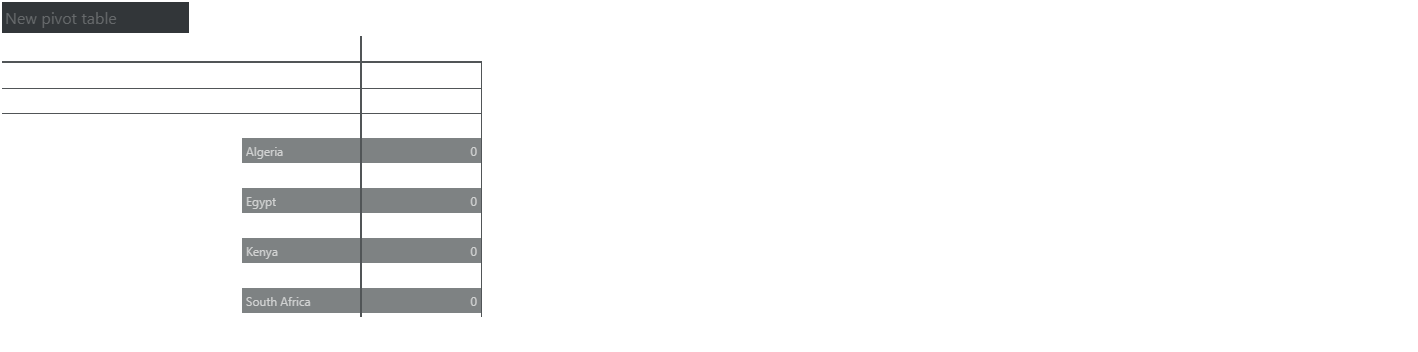

In [36]:
session.widget

In [37]:
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.